In [1]:
import numpy as np

data = np.load("C:\\Users\\user\\AI\\yaleExtB_data.npy")
data.shape

(1500, 5236)

In [2]:
target = np.load("C:\\Users\\user\\AI\\yaleExtB_target.npy")
target.shape

(1500,)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# splitting the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=42) # 100%=>80%-20%

# splitting the training set into training and validation sets.
X_train, X_val,Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 80%=>60%-20%

nof_prin_components = 300
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print('Before Using PCA')
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print('After Using PCA')
print(X_train_pca.shape)
print(X_val_pca.shape)
print(X_test_pca.shape)

Before Using PCA
(900, 5236)
(300, 5236)
(300, 5236)
After Using PCA
(900, 300)
(300, 300)
(300, 300)


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Define the hyperparameter search space
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,), (150,), (200,),(250,),(300,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive']
# }


In [5]:
# # Initialize the MLPClassifier
# mlp = MLPClassifier(max_iter=1000)

# # Initialize RandomizedSearchCV with the hyperparameter search space
# random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42)

# # Perform random search
# random_search.fit(X_train_pca, Y_train)

In [6]:
# Get the best hyperparameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

# print(best_params)
# print(best_model)

In [7]:
# # Evaluate the best model on the validation set
# validation_accuracy = best_model.score(X_val_pca, Y_val)
# print("Validation Accuracy of Best Model:", validation_accuracy)


In [8]:
# import matplotlib.pyplot as plt

# # Get the results of the random search
# results = random_search.cv_results_

# # Extract relevant information
# params = results['params']
# mean_validation_scores = results['mean_test_score']

# # Create lists to store values for plotting
# hidden_layer_sizes = [param['hidden_layer_sizes'][0] for param in params]
# activation = [param['activation'] for param in params]
# solver = [param['solver'] for param in params]
# alpha = [param['alpha'] for param in params]
# learning_rate = [param['learning_rate'] for param in params]

# # Create a figure with multiple subplots
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# # Plot mean validation scores for each hyperparameter
# axes[0, 0].bar(hidden_layer_sizes, mean_validation_scores)
# axes[0, 0].set_title('Hidden Layer Sizes')
# axes[0, 0].set_xlabel('Neurons')
# axes[0, 0].set_ylabel('Mean Validation Score')

# axes[0, 1].bar(activation, mean_validation_scores)
# axes[0, 1].set_title('Activation Function')
# axes[0, 1].set_xlabel('Activation')
# axes[0, 1].set_ylabel('Mean Validation Score')

# axes[0, 2].bar(solver, mean_validation_scores)
# axes[0, 2].set_title('Solver')
# axes[0, 2].set_xlabel('Solver')
# axes[0, 2].set_ylabel('Mean Validation Score')

# axes[1, 0].bar(alpha, mean_validation_scores)
# axes[1, 0].set_title('Alpha (Regularization Parameter)')
# axes[1, 0].set_xlabel('Alpha')
# axes[1, 0].set_ylabel('Mean Validation Score')

# axes[1, 1].bar(learning_rate, mean_validation_scores)
# axes[1, 1].set_title('Learning Rate')
# axes[1, 1].set_xlabel('Learning Rate')
# axes[1, 1].set_ylabel('Mean Validation Score')

# # Hide the empty subplot
# axes[1, 2].axis('off')

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Assuming 'data' and 'target' have been defined somewhere above this code block.

# Splitting the data into training and testing sets.
# X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# # Further splitting the training set into training and validation sets.
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)  # from 80% train set -> 60% training, 20% validation

# Define model
model = LogisticRegression()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search space
space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 100)
}

# Define search procedure
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=42)

# Execute search
result = search.fit(X_train_pca, Y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# Optionally, evaluate the model on the validation set
best_model = result.best_estimator_
val_accuracy = best_model.score(X_val_pca, Y_val)
print('Validation Accuracy: %s' % val_accuracy)


C:\Python-3.10.5\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7620 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1230 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python-3.10.5\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python-3.10.5\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python-3.10.5\lib\site-packages\sklearn\linear_model\_logistic.py", line 78, in _check_solver
    raise ValueError("penalty='none' is not supporte

Best Score: 0.975925925925926
Best Hyperparameters: {'C': 0.0023083741369596266, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.98


In [10]:
# Evaluate the model on the testing set
best_model = result.best_estimator_
test_accuracy = best_model.score(X_test_pca, Y_test)
print('Testing Accuracy: %s' % test_accuracy)

Testing Accuracy: 0.9766666666666667


C:\Users\user\AppData\Local\Temp\ipykernel_18476\2781420932.py:42: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()


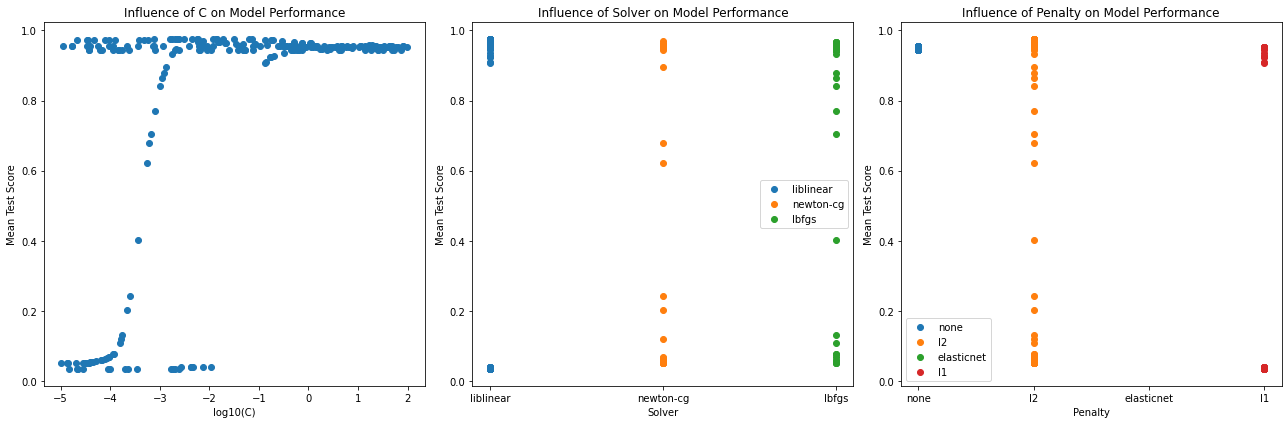

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Previous code blocks assumed to have been executed already, particularly:
# `result` containing the RandomizedSearchCV output.

# Convert the RandomizedSearchCV results into a DataFrame
results_df = pd.DataFrame(result.cv_results_)

# Focus on the mean test scores and the parameters
results_df['mean_test_score'] = results_df['mean_test_score']
results_df['param_C'] = results_df['param_C'].astype(float)  # Ensure C is float for logarithmic scale

# Create a plot to visualize the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plotting 'C' vs 'mean_test_score'
ax[0].scatter(np.log10(results_df['param_C']), results_df['mean_test_score'])
ax[0].set_xlabel('log10(C)')
ax[0].set_ylabel('Mean Test Score')
ax[0].set_title('Influence of C on Model Performance')

# Plotting 'solver' vs 'mean_test_score'
for solver in results_df['param_solver'].unique():
    subset = results_df[results_df['param_solver'] == solver]
    ax[1].scatter(subset['param_solver'], subset['mean_test_score'], label=solver)
ax[1].set_xlabel('Solver')
ax[1].set_ylabel('Mean Test Score')
ax[1].set_title('Influence of Solver on Model Performance')
ax[1].legend()

# Plotting 'penalty' vs 'mean_test_score'
for penalty in results_df['param_penalty'].unique():
    subset = results_df[results_df['param_penalty'] == penalty]
    ax[2].scatter(subset['param_penalty'], subset['mean_test_score'], label=penalty)
ax[2].set_xlabel('Penalty')
ax[2].set_ylabel('Mean Test Score')
ax[2].set_title('Influence of Penalty on Model Performance')
ax[2].legend()

plt.tight_layout()
plt.show()


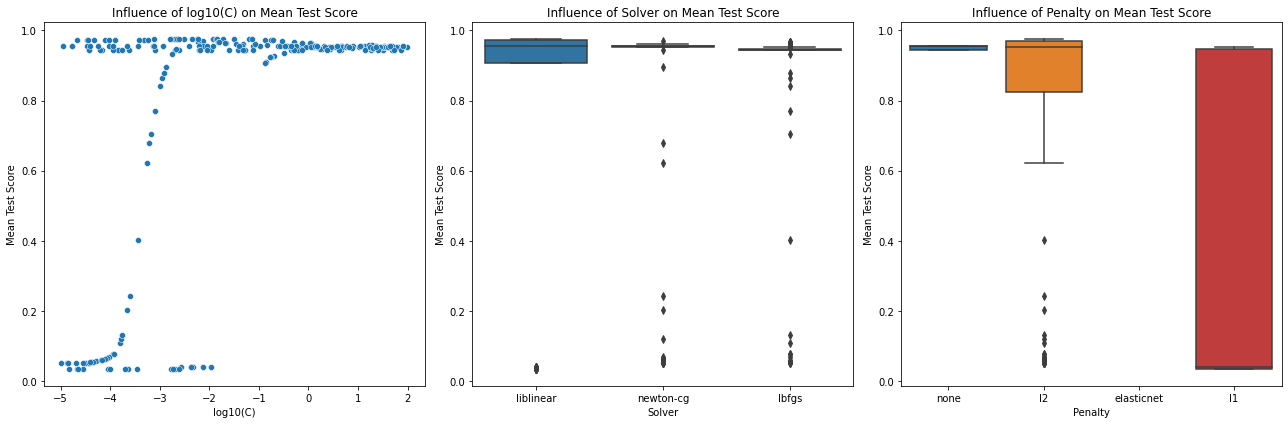

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'result' is the output from RandomizedSearchCV already obtained

# Convert RandomizedSearchCV results into a DataFrame
results_df = pd.DataFrame(result.cv_results_)

# Adding some necessary transformations for better visualization
results_df['param_C'] = results_df['param_C'].astype(float)  # Ensure C is float for better scaling in plots
results_df['log_param_C'] = np.log10(results_df['param_C'])  # Log transform for better visualization

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Effect of 'C' on Mean Test Score
sns.scatterplot(data=results_df, x='log_param_C', y='mean_test_score', ax=axes[0])
axes[0].set_title('Influence of log10(C) on Mean Test Score')
axes[0].set_xlabel('log10(C)')
axes[0].set_ylabel('Mean Test Score')

# Plot 2: Effect of 'solver' on Mean Test Score
sns.boxplot(data=results_df, x='param_solver', y='mean_test_score', ax=axes[1])
axes[1].set_title('Influence of Solver on Mean Test Score')
axes[1].set_xlabel('Solver')
axes[1].set_ylabel('Mean Test Score')

# Plot 3: Effect of 'penalty' on Mean Test Score
sns.boxplot(data=results_df, x='param_penalty', y='mean_test_score', ax=axes[2])
axes[2].set_title('Influence of Penalty on Mean Test Score')
axes[2].set_xlabel('Penalty')
axes[2].set_ylabel('Mean Test Score')

# Display the plots
plt.tight_layout()
plt.show()
